In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
psarr = np.linspace(0.01, 0.45, 20)
prarr = np.linspace(0.55, 1, 25)

In [3]:
ps, pr = np.meshgrid(psarr, prarr)

In [4]:
def root_finder(ps, pr):
    a = 2 * pr - 1
    b = -(2 * pr - ps - 1)
    c = (pr -1) * ps
    root1 = (-b + np.sqrt(b**2 - 4 * a * c)) / 2 / a
    root2 = (-b - np.sqrt(b**2 - 4 * a * c)) / 2 / a
    return root1, root2

In [5]:
root1, root2 = root_finder(ps, pr)

Text(0, 0.5, 'ps')

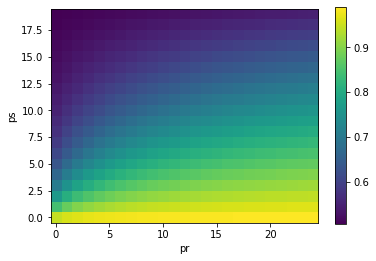

In [6]:
plt.imshow(root1.T, origin='lower')
plt.colorbar()
plt.xlabel('pr')
plt.ylabel('ps')

In [59]:
def update_pt(ps, pr, pt):
    num = ps * (1-pr) * (1-pt) + (1-ps) * pr * pt
    den = pr * pt + (1-pr) * (1-pt)
    return num / den

def simulate_pt_sequence(ps, pr, ptinit, ntrials):
    '''
    Simulate updating of pt
    '''
    pt = ptinit
    ptlst = [pt]
    for i in range(ntrials):        
        pt = update_pt(ps, pr, pt)
        ptlst.append(pt)
    return np.array(ptlst)
        
    
    
def first_switch_id(ps, pr, ptinit, ntrials):
    '''
    Determine the index where pt first crosses 0.5
    ptinit has to be < 0.5
    '''
    assert ptinit < 0.5
    ptlst = simulate_pt_sequence(ps, pr, ptinit, ntrials)
    idx = np.where(ptlst > 0.5)[0]
    if len(idx) == 0:
        return -1 
    else:
        return idx[0]
    
    

In [57]:
a = np.linspace(0, 1, 100)
b= np.where(a > 2)[0]

In [58]:
len(b)

0

0.9083333333333333
0.6232712319570326
0.48361840360647057
0.4136587771203155
0.3824696545284781
0.37506507239303727
0.3833009079118029
0.40237032725391286
0.42925319723102195
0.46195652173913043


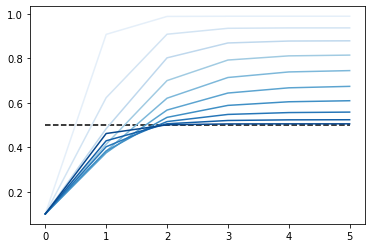

In [60]:
colors = sns.palettes.color_palette('Blues', 10)
idxlst = []
for i,p in enumerate(np.linspace(0.01, 0.45, 10)):
    sim1 = simulate_pt_sequence(p, 1-p, 0.1, 5)
    idx = first_switch_id(p, 1-p, 0.1, 5)
    idxlst.append(idx)
#     sim2 = simulate_pt_sequence(0.1, 0.9, 0.1, 20)
    print(sim1[1])
    plt.plot(sim1, color=colors[i])

plt.hlines(0.5, 0, 5, linestyles='--')

In [71]:
prewlst = np.linspace(0.55, 0.99, 10)
pswitchlst = np.linspace(0.01, 0.45, 15)
idxarr = np.zeros((len(prewlst), len(pswitchlst)))
for idr, prew in enumerate(prewlst):
    for ids, psw in enumerate(pswitchlst):
        root1, _ = root_finder(psw, prew)
        idx = first_switch_id(psw, prew, 1-root1, 10)
        idxarr[idr, ids] = idx

Text(0, 0.5, 'prew')

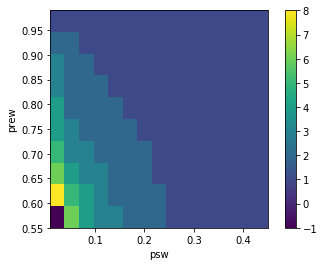

In [72]:
plt.imshow(idxarr, origin='lower', extent=[min(pswitchlst), max(pswitchlst), min(prewlst), max(prewlst)])
plt.colorbar()
plt.xlabel('psw')
plt.ylabel('prew')

In [73]:
idxarr

array([[-1.,  6.,  4.,  3.,  3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 8.,  5.,  4.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 6.,  4.,  3.,  3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 5.,  3.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 4.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 4.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.]])